<a href="https://colab.research.google.com/github/julianchete/03MAIR---Algoritmos-de-Optimizacion---2020/blob/master/SEMINARIO/Seminario_Julian_Grijalba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:  Julian Eduardo Grijalba Facundo  <br>
Url: https://github.com/julianchete/03MAIR---Algoritmos-de-optimizacion---2019/tree/master/SEMINARIO<br>
Problema:
> 1. Elección de grupos de población homogéneos <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

**1. Elección de grupos de población homogenea:** <br>
Una productora ganadera nos encarga la tarea de seleccionar grupos de terneros para aplicar 3 tratamientos diferentes. Para cada uno de los tratamientos debemos seleccionar 3 grupos de terneros que sean lo mas 
homogéneos posible en peso para que en los resultados del tratamiento influya lo menos posible el peso del animal. <br>
- Disponemos de una población de N animales entre machos y hembras <br>
Se solicita diseñar un algoritmo para conseguir una agrupación que cumpla de la  mejor manera posible las especificaciones de la productora.  Nos dan una tabla con el ID del animal, su peso y genero (H/M)  <br>
1. Aun se desconocen los datos concretos de los animales por lo que debemos trabajar con datos que debemos generar de forma aleatoria. <br>
2. Hemos podido averigua que el peso medio del ternero es 37kg con una desviación estándar de 2.1 


(*) La respuesta es obligatoria





                                        

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.<br>




### Sin restricciones

Para calcular el número de posibildiades basicamente se tiene que saber contar y agrupar la información en los N tratamiento, en donde cada uno de estos tiene a su vez N sub-grupos de control.<br>
Comenzamos con un enfoque de que vamos a tener N individuos vacunos. Cada uno de estos tiene como caracteristica tres datos esenciales : Su identificadro, peso y genero (H/M).<br>
Lo pasos siguientes serian :

1.   **Grupos de tratamiento:** Se realiza la agrupación primero de tres grupos de forma aleatoria, lo cual tendria una complejidad de o(n/N) x N  = **O(n)** .
2.   **Subgrupos de control :** Se realiza la sub-agrupación de los tratamiento generados en la anterior etapa, en 3 de control, lo cual es  o(n/N) x N  = **O(n)**

Con este enfoque se lograria la distribución de los vacunos , que cumplan con los estadares de peso para ser tratados en los diferentes enfoques que se desean realizar. 

### Con restricciones

Para calcular el número de posibildiades basicamente se tiene que saber contar y agrupar la información en los tres tratamiento, en donde cada uno de estos tiene a su vez tres sub-grupos de control.<br>
Comenzamos con un enfoque de que vamos a tener N individuos vacunos. Cada uno de estos tiene como caracteristica tres datos esenciales : Su identificadro, peso y genero (H/M).<br>
Lo pasos siguientes serian :

1.   **Descartar outliers :** Se tiene como base que el peso promedio es 37 con una desviación de 2.1, por tal motivo se filtra todo lo que este por fuera de este rango de confianza. Esto al ser un recorrido total  es **O(n)**
2.   **Grupos de tratamiento:** Se realiza la agrupación primero de tres grupos de forma aleatoria, lo cual tendria una complejidad de o(n/3) x 3  = **O(n)** .
3.   **Subgrupos de control :** Se realiza la sub-agrupación de los tratamiento generados en la anterior etapa, en 3 de control, lo cual es  o(n/9) x 9  = **O(n)**

Con este enfoque se lograria la distribución de los vacunos , que cumplan con los estadares de peso para ser tratados en los diferentes enfoques que se desean realizar. 

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)*

## Estructura de datos
Un dataframe  es la más propensa a realizar esta actividad, ya que permite por medio de sus indices realizar la segmentación de forma  sencilla, permite encontrar la distribución de los valores sin necesidad de  invertir tiempo en codificación , y facilita el uso de librerias adicionales que puedan mejorar los tiempos de respuesta para la segmentación, como tambien implementar nuevas funciones en un futuro  para este tipo de problemas. Un ejemplo de esto , es si se quisiera integrar un tipo de orden especifico en los requerimeintos de la solución, dataframe ya tiene implementado algoritmos de ordenamiento como son ‘quicksort’, ‘mergesort’, ‘heapsort.
En el inicio de la actividad se planteo realizarlo por listas o por matrices, sin embargo en el momento en que se avanzaba en la actividad y derivado a las funciones anterior descrita y a la facilidad de integración con nuevas librerias, se prefirio la estructuda de datos seleccionado. 


Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

**Respuesta**
## Función objetivo
 Una función objetivo expresa el objetivo principal del modelo que se debe minimizar o maximizar. Para el caso de este ejercicio es la maximización de individuos que peudan ser parte del estudio , con el cual garanticen el exito del tratamiento, es por ello que se definen no solo con un objetivo de A/B Testing, sino con A/B/C testing, asegurando de esta forma unos subgrupos de control por cada tratamiento especifico a ser implementado, como tambien para medir el exito del mismo
 
 ## Maximización
 Es un problema de maximización como se describe en su función objetivo, ya que esta buscando el mayor número de individuos que puedan ser agrupados en N conjuntos (por restricción del ejercicio es 3), los cuales se deben objetener al menos tres subconjuntos (por restricciones del ejercicio) con el fin de garantizar la medición correcta de los tratamientos

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta:
## Fuerza Bruta

In [0]:
## Generar población de forma aleatoria 
import random
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

def generarMuestra(N):
  # Genero un dataframe con la secuencia
  datos = pd.DataFrame({ 'id' : range(1, N + 1 ,1)  for _ in range(N) })
  # genero los valores aleatorios de Genero '
  datos['id_genero'] = np.random.choice([0, 1], datos.shape[0])
  # genero los valores aleatorios de Peso
  datos['num_peso'] =  np.random.uniform(35, 40,size=N)
  # se visualiza finalización
  print ("Se han genero la siguiente cantidad de muestras vacunas :",N)
  return datos

def eliminarOutliers(dataframe):
 
  media=37
  desviacion=2.1
  minimo = media - desviacion
  maximo = media + desviacion
  indice= (dataframe['num_peso'] >= minimo) & (dataframe['num_peso'] <= maximo)
  total = sum(indice)
  print ("Se han eliminado "+str(len(dataframe)-total)+" outliers, la nueva cantidad de animales es de:"+str(total))
  return dataframe[indice]


# El objetivo de esta funcion es generar n particiones de un dataframe sin repetir valores en las mismas 
def crearParticiones(dataframe, num_particiones):
  # Se define el tamaño de la partición
  tam_particiones = math.floor(len(dataframe)/num_particiones)
  # Se definen los valores globales como la cantidad de registros
  registros = dataframe.index.values
  # se define el valor del retorno  y
  resultado = list()
  # Se itera por el numero de particiones definidas
  for i in range(num_particiones):
      # Se selecciona aleatoriamente el individuo
      animales_seleccionados = np.random.choice(registros, tam_particiones, replace=False)
      # Se obtiene los indices y se agregan a los valores de control
      indice_valores = dataframe.loc[animales_seleccionados]
      tratamiento = pd.DataFrame(indice_valores)
      resultado.append(tratamiento)
      registros = np.setdiff1d(registros, animales_seleccionados)

  return resultado

def generarGrupos(numero_datos):
  # genero los datos
  datos = generarMuestra(numero_datos)
  # elimino los outliers
  datos = eliminarOutliers (datos)
  # Genero las tres particiones requeridas 
  tratamientos = crearParticiones(datos,3)

  # defino los tratamientos
  tam_tratamientos = math.floor(len(datos)/3)
  tratamiento_1 = tratamientos[0]
  tratamiento_2 = tratamientos[1]
  tratamiento_3 = tratamientos[2]
  print("Se crean los tres grupos de animales por tratamiento, con un tamaño de "+str(tam_tratamientos)+" animales")

  # A su vez genero una lista de agrupaciones para los tres grupos de control por tratamiento definido
  # Cada listo contiene 3 dataframe con los grupos de control 
  grupo_control_trat1 = crearParticiones(tratamiento_1,3) 
  grupo_control_trat2 = crearParticiones(tratamiento_2,3) 
  grupo_control_trat3 = crearParticiones(tratamiento_3,3)
  grupos_control = [grupo_control_trat1,grupo_control_trat2,grupo_control_trat3]
  print("Se crean los tres sub-grupos de control para cada tratamiento aplicado, con un tamaño de "+str(math.floor(tam_tratamientos/3))+" animales")
  return tratamientos, grupos_control

def graficarGrupos(dataframe):
  print(" Distribución de los animales por tratamiento")
  print(" Genero 0 = Hembras,  1 = Machos")
  for i in dataframe:
    g = sns.FacetGrid(i, col="id_genero")
    g.map(plt.hist, "num_peso")
    g.set_axis_labels("Peso Animal", "No. Animales")

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta
## Calculo de complejidad
Como se describe en el punto 1 , la complejidad del algoritmo es **O(3n)** debido a : 

1.   **Descartar outliers :** Se tiene como base que el peso promedio es 37 con una desviación de 2.1, por tal motivo se filtra todo lo que este por fuera de este rango de confianza. Esto al ser un recorrido total  es **O(n)**
2.   **Grupos de tratamiento:** Se realiza la agrupación primero de tres grupos de forma aleatoria, lo cual tendria una complejidad de o(n/3) x 3  = **O(n)** .
3.   **Subgrupos de control :** Se realiza la sub-agrupación de los tratamiento generados en la anterior etapa, en 3 de control, lo cual es  o(n/9) x 9  = **O(n)**



(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta:
## Mejora del algoritmo 

In [0]:
# En la generación de los datos directamente se descarta los valores que sean outlier
# con el objetivo de eliminar el o(n) de esta función
def generarMuestraOptimizado(numero_datos):

  # Se genera directamente el dataframe eliminando operaciones de creación de nuevas columnas
  dataframe = pd.DataFrame({'id' : range(1, numero_datos + 1 ,1) ,
                    'id_genero': np.random.choice([0, 1],size=numero_datos),
                    'num_peso':  np.random.uniform(35, 40,size=numero_datos)  })
    
  # Se tiene los valores globales
  media=37
  desviacion=2.1
  minimo = media - desviacion
  maximo = media + desviacion
  # Se plantea usando el enfoque de Z-score sin embargo realiza una complejidad semejante por ello se descarta
  indice= (dataframe['num_peso'] >= (media - desviacion)) & (dataframe['num_peso'] <= (media + desviacion))
  num_outliers = sum(indice)
  print ("Se han eliminado "+str(len(dataframe)-num_outliers)+" outliers, la nueva cantidad de animales es de: "+str(num_outliers))
  return dataframe[indice]

# El costo de ejecución de esta función por indices es de O(5) en vez de O(n)
def crearParticionesOptimizado(dataframe, numero_particionnes):
  tam_particiones = math.floor(len(dataframe)/numero_particionnes)
  tratamiento_1 = datos[:tam_particiones]
  tratamiento_2 = datos[tam_particiones+1:tam_particiones*2]
  tratamiento_3 = datos[(tam_particiones*2)+1:tam_particiones*3] 
  resultado = [tratamiento_1,tratamiento_2,tratamiento_3]
  return resultado

def generarGruposOptimizado(numero_datos):
  # genero los datos y eliminación de outliers
  datos = generarMuestraOptimizado(numero_datos)
  #  MEJORA  pasar a 2xO(N) a O(15) # 
  #  Se asignan por indices los valores para evitar O(n) y pasar a O(5)
  tratamientos = crearParticionesOptimizado(datos,particiones)
  # Se generan los subgrupos por tratamiento a un costo de 3 x O(5) = O(15)
  grupos_control = [crearParticionesOptimizado(tratamientos[0],3), 
                    crearParticionesOptimizado(tratamientos[1],3),
                    crearParticionesOptimizado(tratamientos[2],3)]

  return tratamientos, grupos_control

(*)Calcula la complejidad del algoritmo 

Respuesta:
## Calculo de complejidad
A diferencia del algoritmo original que tiene una complejidad de  **O(3n)** , este se disminuye a **O(2n) + O(20)** ,  debido a: 

1.    **Grupos de tratamiento:** Se realiza la  asignación por índices en vez de por bucles de iteración pasando de una complejidad de  **O(n)** a  **O(5)** .
2.   **Subgrupos de control :** Se realiza la  asignación por índices en vez de por bucles de iteración pasando de una complejidad de  **O(n)** a  **O(15)** .

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Aplica el algoritmo al juego de datos generado

 ## Generación y aplicación del algoritmo al juego de datos
 En la solución planteada se define una función que genere los datos y automaticamente los deje agrupados segun lo requerido por el probelma. Se describiría a continuación los 2 enfoques, el original y el optimizado.

## Solución fuerza bruta

Se han genero la siguiente cantidad de muestras vacunas : 250
Se han eliminado 62 outliers, la nueva cantidad de animales es de:188
Se crean los tres grupos de animales por tratamiento, con un tamaño de 62 animales
Se crean los tres sub-grupos de control para cada tratamiento aplicado, con un tamaño de 20 animales
Se verifica la calidad de los datos con la distribución de los mismos
 Distribución de los animales por tratamiento
 Genero 0 = Hembras,  1 = Machos


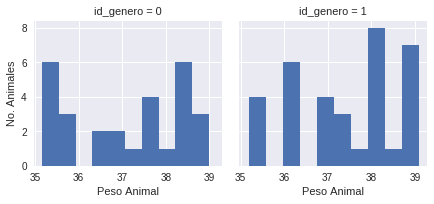

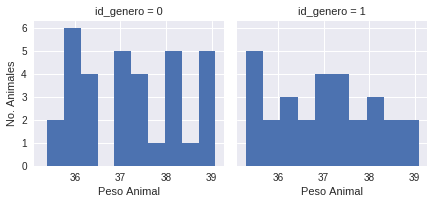

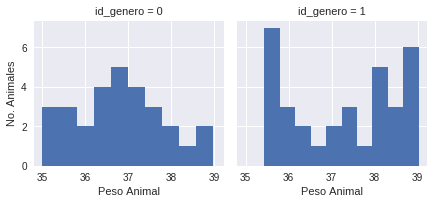

In [99]:
# defino las muestras a generar
numero_datos=250
tratamientos, grupos_tratamiento=generarGrupos(numero_datos)
print("Se verifica la calidad de los datos con la distribución de los mismos")
graficarGrupos(tratamientos)

## Solución mejorada

Se han eliminado 42 outliers, la nueva cantidad de animales es de: 208
Se verifica la calidad de los datos con la distribución de los mismos
 Distribución de los animales por tratamiento
 Genero 0 = Hembras,  1 = Machos


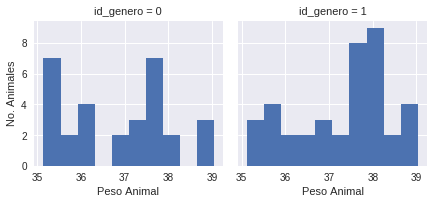

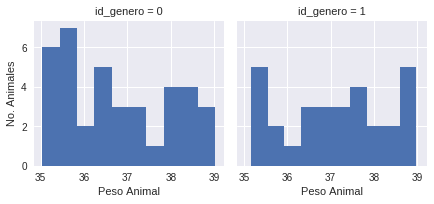

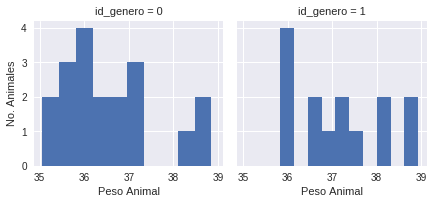

In [100]:
# Tamaño del conjunto de datos
numero_datos=250
tratamientos, grupos_tratamiento=generarGruposOptimizado(numero_datos)
print("Se verifica la calidad de los datos con la distribución de los mismos")
graficarGrupos(tratamientos)

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo





Respuesta:
## Referencias utilizadas

1.   Estructura de datos : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
2.   Selección aleatoria : https://www.oreilly.com/library/view/python-cookbook/0596001673/ch02s09.html
3.   Problemas de optimización:https://relopezbriega.github.io/blog/2017/01/18/problemas-de-optimizacion-con-python/
4.   Ordenamiento : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
5.   Gestión de subconjuntos de datos : https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c
6.   Constraint y objetivo : https://nptel.ac.in/courses/105108127/pdf/Module_1/M1L2slides.pdf
7.   Graficas: https://seaborn.pydata.org/tutorial/axis_grids.html

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño.



Respuesta:
## Análisis del problema

El problema puede evolucionar a :

1.  Valores que no sean pre-definidos como la restricciones de 3 tratamientos y 3 conjuntos, por tal motivo, las funciones definidas estan orientadas actualmente a responder a N valores definidos. 
2.   analizar el resultado de estos tratamientos, con el fin de identificar cual fue el más efectivo o no , con base en los grupos de control definidos. 
3.  Incrementar la cantidad de caracteristicas de los animales con el fin de aplicar un analisis más profundo de los factores de efectividad o no de los tratamientos. Entre los factores puede ser edad del animal, tipo de raza,  si ha tenido crias o no (para las Hembras), temperatura de la toma de la muestra y/o aplicación del tratamiento, estación en que se aplica o toma la muestra, entre otras. 
4. Incluir indicadores de efectivdad de los tratamientos 


